# Overview

- Kaggle の jigsaw-toxic-severity-rating コンペ。
- 過去コンペデータセット、公開データセットと本コンペのデータセットの関係を確認。
- blending 技法の確認。

### Reference
- [Baseline - CLEANED - TFIDF - Ridge [LB: 0.816] | Kaggle](https://www.kaggle.com/samarthagarwal23/baseline-cleaned-tfidf-ridge-lb-0-816/)
- [Mega (B)Ridge to the top [LB: 0.85] | Kaggle](https://www.kaggle.com/samarthagarwal23/mega-b-ridge-to-the-top-lb-0-85)

# Directories

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/ruddit-jigsaw-dataset/LICENSE
/kaggle/input/ruddit-jigsaw-dataset/README.md
/kaggle/input/ruddit-jigsaw-dataset/requirements.txt
/kaggle/input/ruddit-jigsaw-dataset/ruddit-comment-extraction.ipynb
/kaggle/input/ruddit-jigsaw-dataset/Dataset/create_dataset_variants.py
/kaggle/input/ruddit-jigsaw-dataset/Dataset/identityterms_group.txt
/kaggle/input/ruddit-jigsaw-dataset/Dataset/Ruddit.csv
/kaggle/input/ruddit-jigsaw-dataset/Dataset/ReadMe.md
/kaggle/input/ruddit-jigsaw-dataset/Dataset/Ruddit_individual_annotations.csv
/kaggle/input/ruddit-jigsaw-dataset/Dataset/ruddit_with_text.csv
/kaggle/input/ruddit-jigsaw-dataset/Dataset/node_dictionary.npy
/kaggle/input/ruddit-jigsaw-dataset/Dataset/post_with_issues.csv
/kaggle/input/ruddit-jigsaw-dataset/Dataset/Thread_structure.txt
/kaggle/input/ruddit-jigsaw-dataset/Dataset/load_node_dictionary.py
/kaggle/input/ruddit-jigsaw-dataset/Dataset/sample_input_file.csv
/kaggle/input/ruddit-jigsaw-dataset/Models/BERT.py
/kaggle/input/ruddi

# Install & imports

In [2]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from matplotlib_venn import venn2, venn3
from scipy.optimize import brute

# Parameters

In [3]:
df1 = pd.read_csv('/kaggle/input/jigsaw-toxic-comment-classification-challenge/train.csv')
df2 = pd.read_csv('/kaggle/input/jigsaw-multilingual-toxic-comment-classification/jigsaw-toxic-comment-train.csv')
df3 = pd.read_csv('/kaggle/input/ruddit-jigsaw-dataset/Dataset/ruddit_with_text.csv')
df4 = pd.read_csv('/kaggle/input/jigsaw-toxic-severity-rating/validation_data.csv')

In [4]:
display(df1)
display(df2)
display(df3)
display(df4)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
223544,fff8f64043129fa2,":Jerome, I see you never got around to this…! ...",0,0,0,0,0,0
223545,fff9d70fe0722906,==Lucky bastard== \n http://wikimediafoundatio...,0,0,0,0,0,0
223546,fffa8a11c4378854,==shame on you all!!!== \n\n You want to speak...,0,0,0,0,0,0
223547,fffac2a094c8e0e2,MEL GIBSON IS A NAZI BITCH WHO MAKES SHITTY MO...,1,0,1,0,1,0


,post_id,comment_id,txt,url,offensiveness_score
0,42g75o,cza1q49,> The difference in average earnings between m...,https://www.reddit.com/r/changemyview/comments...,-0.083
1,42g75o,cza1wdh,"The myth is that the ""gap"" is entirely based o...",https://www.reddit.com/r/changemyview/comments...,-0.022
2,42g75o,cza23qx,[deleted],https://www.reddit.com/r/changemyview/comments...,0.167
3,42g75o,cza2bw8,The assertion is that women get paid less for ...,https://www.reddit.com/r/changemyview/comments...,-0.146
4,42g75o,cza2iji,You said in the OP that's not what they're mea...,https://www.reddit.com/r/changemyview/comments...,-0.083
...,...,...,...,...,...
5833,cu67co,f0i0mqp,They should only censor things that talk badly...,https://i.redd.it/kfsmqzxae3i31.jpg/f0i0mqp/,0.064
5834,cganu1,f80wlxq,> and one of them is a woman. \n\nOH SHIT we b...,https://www.reddit.com/r/worldpolitics/comment...,0.458
5835,cu67co,f8uksbp,how is this flared as US politics,https://i.redd.it/kfsmqzxae3i31.jpg/f8uksbp/,-0.292
5836,cganu1,fa6nc1r,People in Hong Kong must decide if they are go...,https://www.reddit.com/r/worldpolitics/comment...,0.333


,worker,less_toxic,more_toxic
0,313,This article sucks \n\nwoo woo wooooooo,WHAT!!!!!!!!?!?!!?!?!!?!?!?!?!!!!!!!!!!!!!!!!!...
1,188,"""And yes, people should recognize that but the...",Daphne Guinness \n\nTop of the mornin' my fav...
2,82,"Western Media?\n\nYup, because every crime in...","""Atom you don't believe actual photos of mastu..."
3,347,And you removed it! You numbskull! I don't car...,You seem to have sand in your vagina.\n\nMight...
4,539,smelly vagina \n\nBluerasberry why don't you ...,"hey \n\nway to support nazis, you racist"
...,...,...,...
30103,461,I'm sorry. I'm not an admin. I will give you t...,get out my large penis
30104,527,I'm sorry. I'm not an admin. I will give you t...,get out my large penis
30105,352,"wow...\nare you out of your mind, how was my e...",Piss off you slant eyed-gook
30106,311,"wow...\nare you out of your mind, how was my e...",Piss off you slant eyed-gook


In [5]:
df1_unique = set(df1['comment_text'].unique())
df2_unique = set(df2['comment_text'].unique())
df3_unique = set(df3['txt'].unique())
df4_unique = set(pd.concat([df4['less_toxic'], df4['more_toxic']], axis=0).unique())

/opt/conda/lib/python3.7/site-packages/venn/_backwards_compatibility.py:16: UserWarning: `get_labels()` is retained for backwards compatibility; use `generate_petal_labels()` or the higher level `venn()` instead
  "`get_labels()` is retained for backwards compatibility; " +
/opt/conda/lib/python3.7/site-packages/venn/_backwards_compatibility.py:32: UserWarning: `venn4()` is retained for backwards compatibility; use `venn()` instead
  "use `venn()` instead"


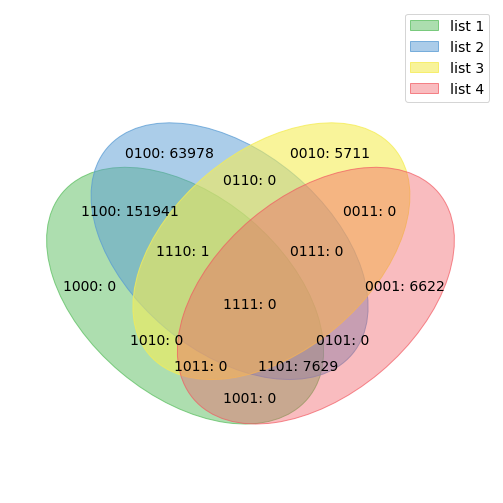

In [6]:
!pip install -q venn
import venn

labels = venn.get_labels([df1_unique, df2_unique, df3_unique, df4_unique], fill=['number', 'logic'])
fig, ax = venn.venn4(labels, names=['list 1', 'list 2', 'list 3', 'list 4'])
fig.show()

上図だと、緑のデータセット（=1回目の Jigsaw コンペ）が役立っていない。他のいずれかのデータセットに含まれている。 

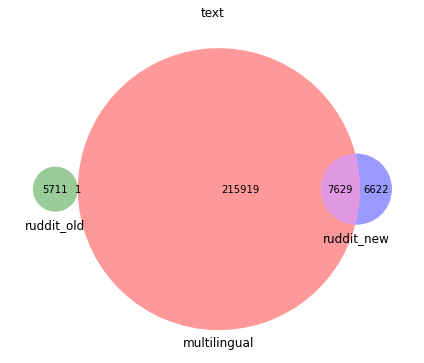

In [7]:
plt.figure(figsize=(6, 6))
venn3(subsets=(df2_unique, df3_unique, df4_unique),
      set_labels=('multilingual', 'ruddit_old', 'ruddit_new'))
plt.title('text')
plt.tight_layout()
plt.show()

- 過去コンペのデータのほうが大きい。
- 現行コンペとのテキストの重複は7629文。
- 現行コンペの6622文は過去コンペに未出現。

In [8]:
n_size = 10000
p1 = np.random.random(n_size)
p2 = np.random.random(n_size)
p3 = np.random.random(n_size)
p4 = np.random.random(n_size)
p5 = np.random.random(n_size)
p6 = np.random.random(n_size)
p7 = np.random.random(n_size)
p8 = np.random.random(n_size)

In [9]:
%%time

def optimize_wts():
    func = lambda x: -1*(((x[0]*p1 + x[1]*p3 + x[2]*p5 + x[3]*p7) < (x[0]*p2 + x[1]*p4 + x[2]*p6 + x[3]*p8)).mean())

    rranges = (slice(0.10, 0.90, 0.05), 
               slice(0.10, 0.90, 0.05),
               slice(0.10, 0.90, 0.05),
               slice(0.10, 0.90, 0.05),
              )

    resbrute = brute(
        func, 
        rranges, 
        full_output=True,
        finish=None)
    
    return resbrute

resbrute = optimize_wts()

CPU times: user 7.15 s, sys: 29.5 ms, total: 7.18 s
Wall time: 7.2 s


In [10]:
print(f'optimal solution x0 = {resbrute[0]}')
print(f'opmimal value f(x0) = {-resbrute[1]}')

optimal solution x0 = [0.15 0.15 0.6  0.7 ]
opmimal value f(x0) = 0.5092
